<a href="https://colab.research.google.com/github/NeZorinEgor/Computer-vision/blob/main/Pencils/Pencils.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

img № 1: 0
img № 2: 1
img № 3: 1
img № 4: 2
img № 5: 2
img № 6: 3
img № 7: 3
img № 8: 1
img № 9: 2
img № 10: 2
img № 11: 3
img № 12: 1
imgs shows 21 pencils


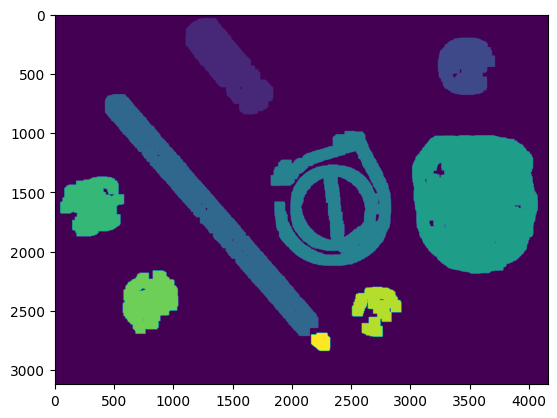

In [28]:
import numpy as np
import cv2
from skimage.measure import label, regionprops

count = 0
for i in range(12):
    image = cv2.imread(f'images/img ({i+1}).jpg')
    image_gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

    edges = cv2.Canny(image_gray, 30, 100)
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    clean_image = cv2.drawContours(np.zeros_like(image_gray), contours, -1, (255, 255, 255), thickness=cv2.FILLED)
    dilated_image = cv2.dilate(clean_image, np.ones((80, 80), np.uint8), iterations=1)

    image_label = label(dilated_image)

    pencils = sum(1 for region in regionprops(image_label) if (
        15 > (x := region.bbox[2] - region.bbox[0]) / (y := region.bbox[3] - region.bbox[1]) > 10 or
        0.05 < x / y < 0.1 or
        0.06 < (count_pixels := np.count_nonzero(image_label == region.label)) / (x * y) < 0.3
    ))

    count += pencils
    print(f"img № {i+1}: {pencils}")
    plt.imshow(image_label)

print(f"imgs shows {count} pencils")
